You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Import Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import re
import joblib

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn components
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# NLP processing
import spacy

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [9]:
# Import necessary libraries
import pandas as pd
import os

# Get the current working directory
current_dir = os.getcwd()

# Construct the correct path to the dataset
# Since we're already in the starter directory, we only need to go to 'data/reviews.csv'
data_path = os.path.join(current_dir, 'data', 'reviews.csv')

# Load the dataset
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nDataset information:")
df.info()

# Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (18442, 9)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB

First 5 rows:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


# Your Work

## Data Exploration

In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64


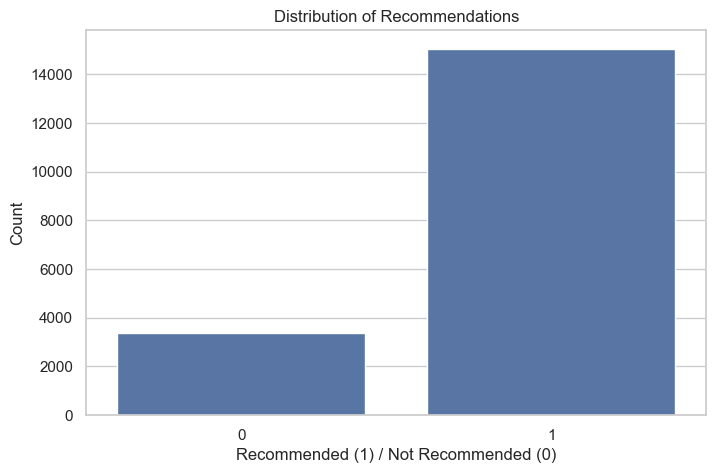

In [13]:
# Visualize target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Recommended IND', data=df)
plt.title('Distribution of Recommendations')
plt.xlabel('Recommended (1) / Not Recommended (0)')
plt.ylabel('Count')
plt.show()

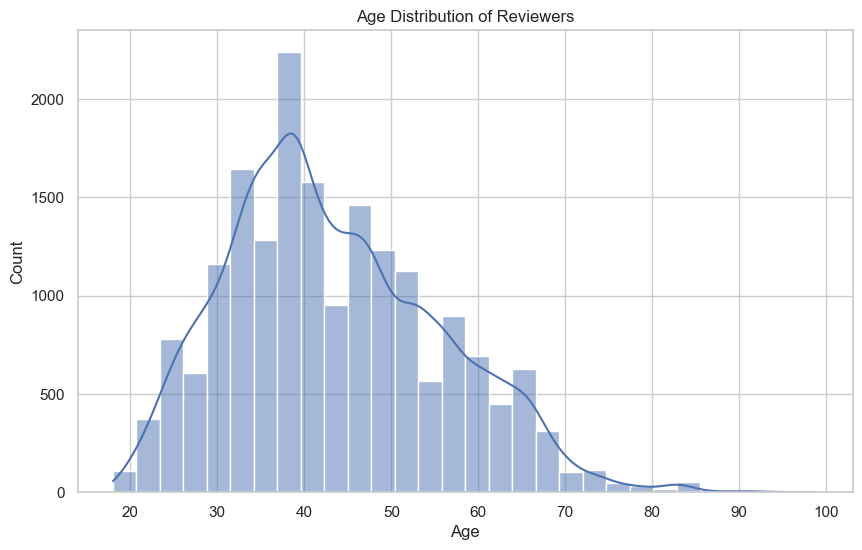

In [14]:
# Explore age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

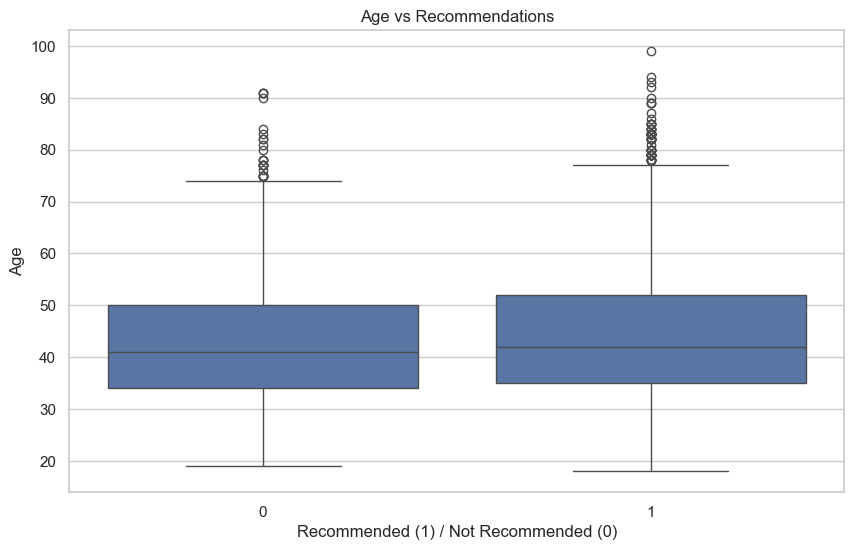

In [15]:
# Analyze relationship between age and recommendations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended IND', y='Age', data=df)
plt.title('Age vs Recommendations')
plt.xlabel('Recommended (1) / Not Recommended (0)')
plt.ylabel('Age')
plt.show()

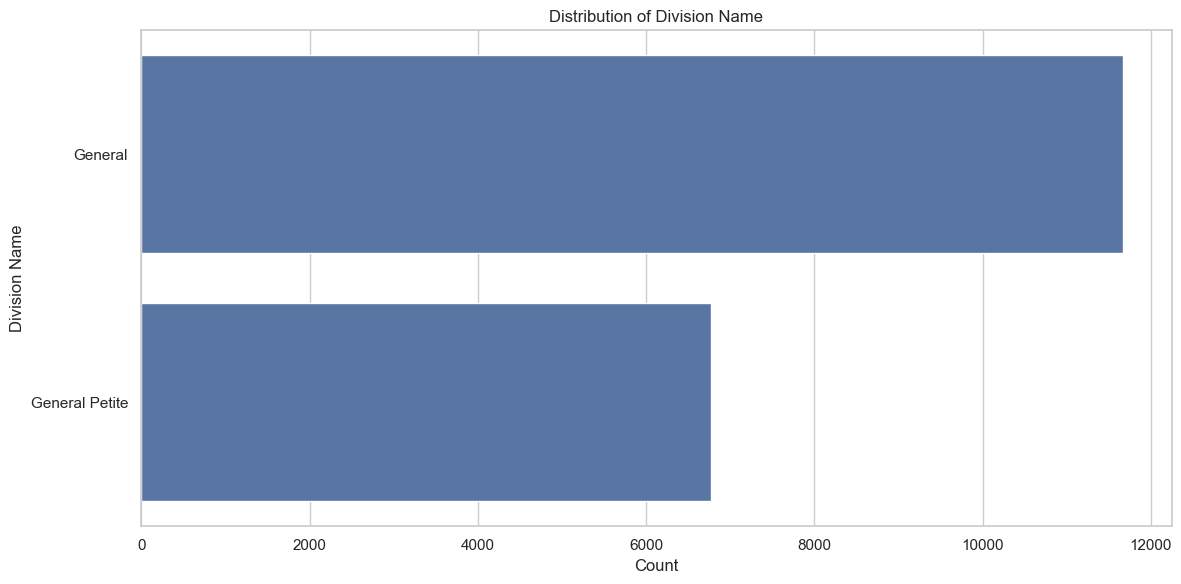

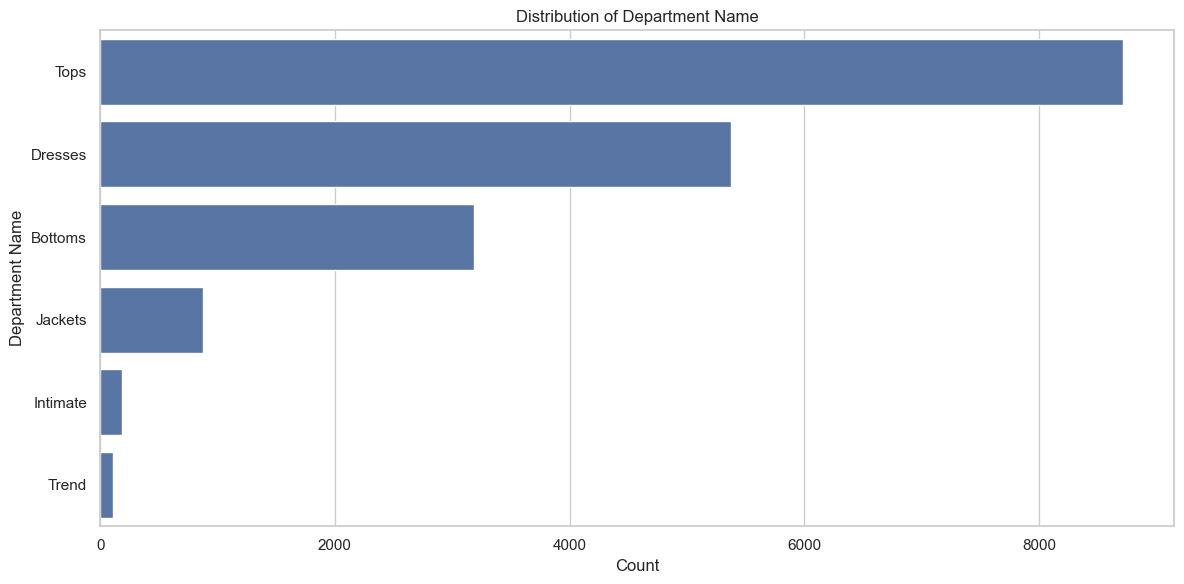

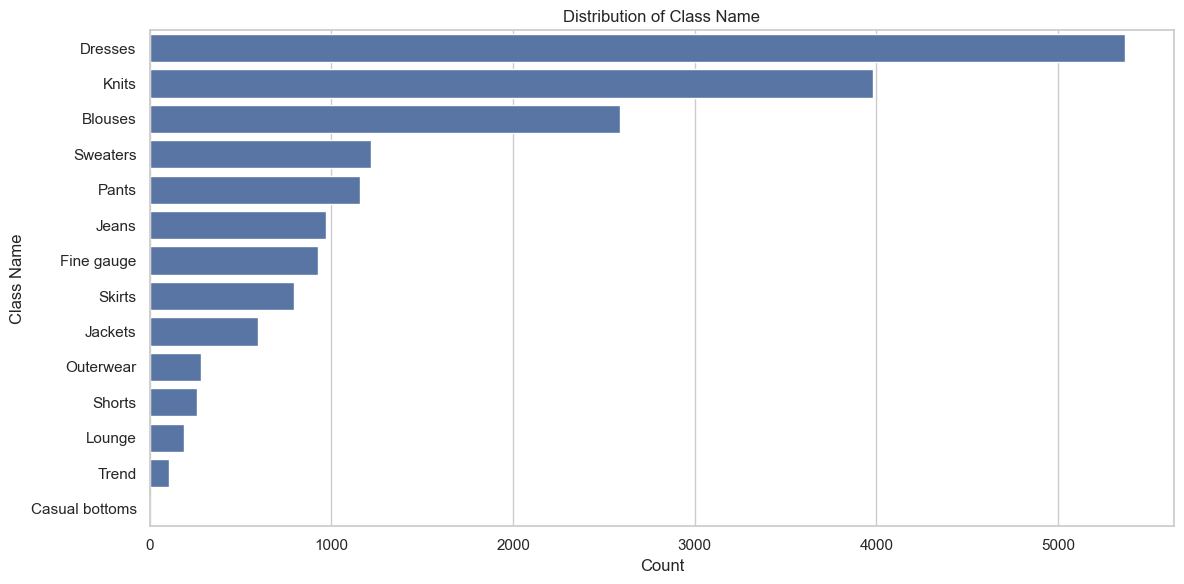

In [16]:
# Explore categorical features
categorical_features = ['Division Name', 'Department Name', 'Class Name']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

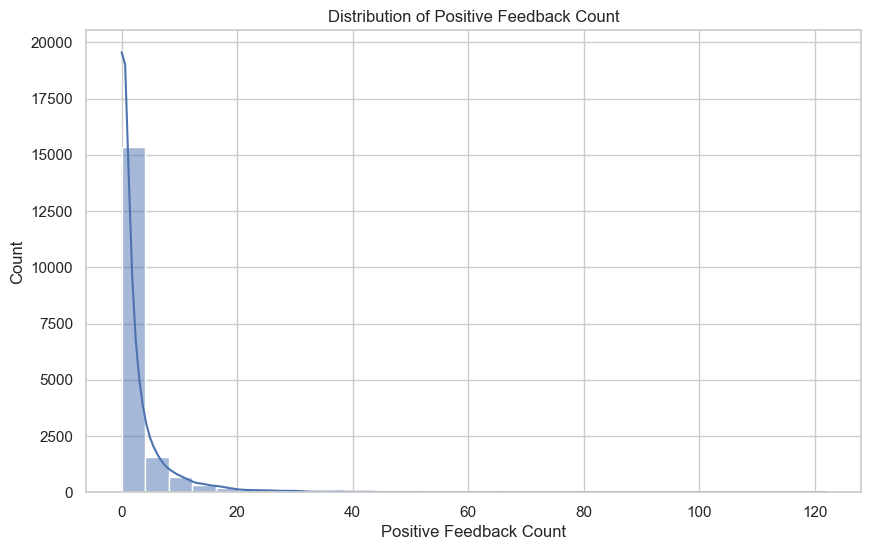

In [17]:
# Explore numerical features
numerical_features = ['Positive Feedback Count']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

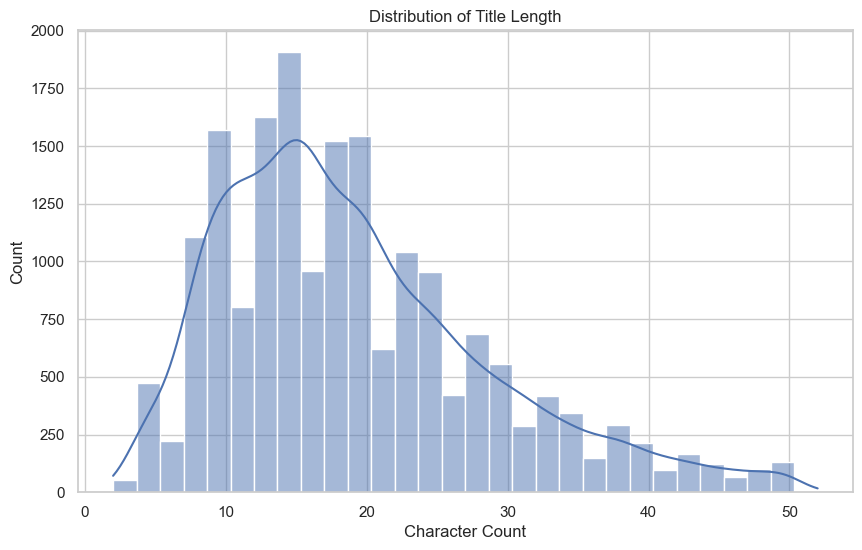

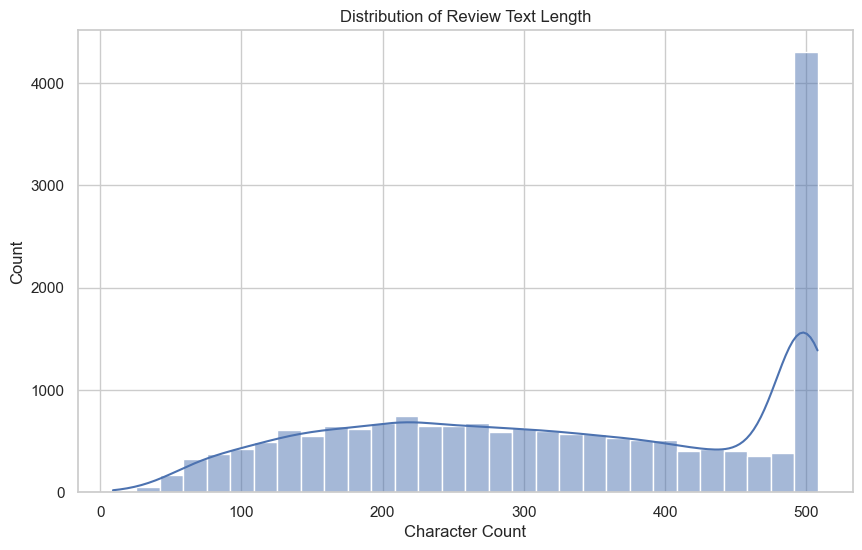

In [18]:
# Explore text features
text_features = ['Title', 'Review Text']

for feature in text_features:
    # Calculate text lengths
    df[f'{feature}_length'] = df[feature].fillna('').apply(len)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df[f'{feature}_length'], bins=30, kde=True)
    plt.title(f'Distribution of {feature} Length')
    plt.xlabel('Character Count')
    plt.ylabel('Count')
    plt.show()
    
    # Remove temporary column
    df.drop(f'{feature}_length', axis=1, inplace=True)

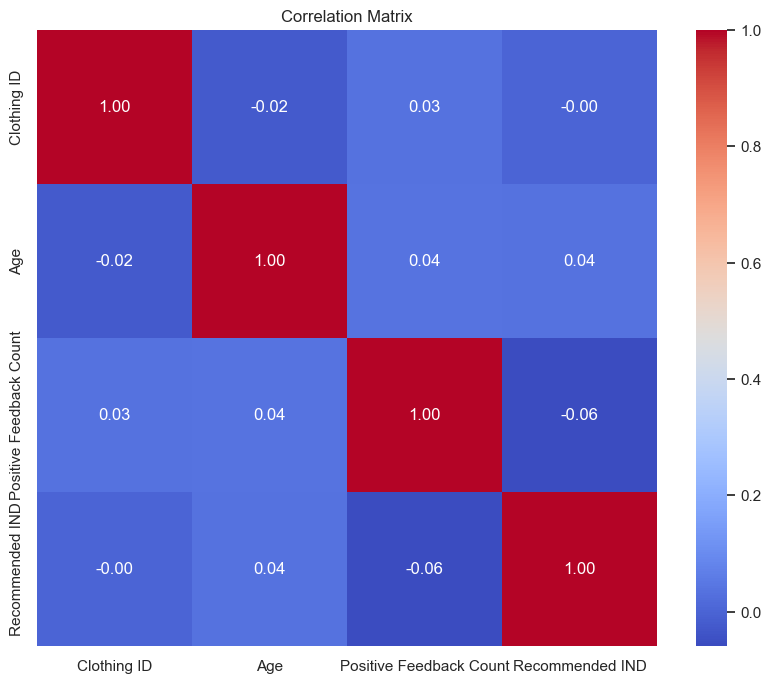

In [19]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000


## Data Preparation

In [21]:
# Separate features from target
X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND'].copy()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (14753, 8)
Test set shape: (3689, 8)


In [25]:
# Import spaCy and download the required model
import spacy
from spacy.cli import download

try:
    # Try to load the model
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("spaCy model 'en_core_web_sm' is already installed.")
except OSError:
    # Download the model if not available
    print("Downloading spaCy model 'en_core_web_sm'...")
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("Model downloaded successfully.")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Model downloaded successfully.


## Text Processing

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    """Custom text processor using spaCy for NLP tasks"""
    
    def __init__(self):
        self.nlp = None
    
    def fit(self, X, y=None):
        # Load the spaCy model with disabled components for efficiency
        try:
            self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        except OSError:
            print("Downloading spaCy model 'en_core_web_sm'...")
            from spacy.cli import download
            download('en_core_web_sm')
            self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        return self
    
    def process_text(self, text):
        """Process a single text document"""
        if pd.isna(text):
            return ""
        
        # Convert to lowercase and remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
        
        # Process with spaCy
        doc = self.nlp(text)
        
        # Remove stop words, punctuation, and lemmatize
        processed_tokens = [
            token.lemma_ for token in doc 
            if not token.is_stop and not token.is_punct and len(token) > 2
        ]
        
        return " ".join(processed_tokens)
    
    def transform(self, X, y=None):
        """Process a collection of text documents"""
        return [self.process_text(text) for text in X]

## Building Pipeline

In [33]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re
import spacy

# Define feature types
numerical_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_features = ['Title', 'Review Text']

# Numerical features transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Initialize text processor
text_processor = TextProcessor()

# Text feature transformers
title_transformer = Pipeline(steps=[
    ('processor', text_processor),
    ('tfidf', TfidfVectorizer(max_features=100, ngram_range=(1, 2)))
])

review_transformer = Pipeline(steps=[
    ('processor', text_processor),
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1, 2)))
])

# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('title', title_transformer, 'Title'),
        ('review', review_transformer, 'Review Text')
    ])

# Create full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

## Training Pipeline

Accuracy: 0.8620
Precision: 0.8682
Recall: 0.9797
F1 Score: 0.9206

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.34      0.47       678
           1       0.87      0.98      0.92      3011

    accuracy                           0.86      3689
   macro avg       0.83      0.66      0.70      3689
weighted avg       0.85      0.86      0.84      3689



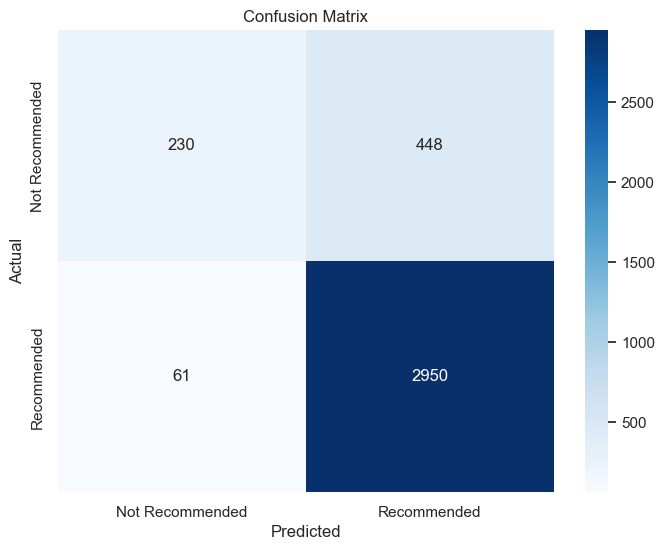

In [34]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter Tuning

In [35]:
# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Set up grid search
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Execute grid search
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Get best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


## Evaluating the Best Model

Best Model - Accuracy: 0.8634
Best Model - Precision: 0.8688
Best Model - Recall: 0.9807
Best Model - F1 Score: 0.9214

Best Model - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.34      0.48       678
           1       0.87      0.98      0.92      3011

    accuracy                           0.86      3689
   macro avg       0.83      0.66      0.70      3689
weighted avg       0.86      0.86      0.84      3689



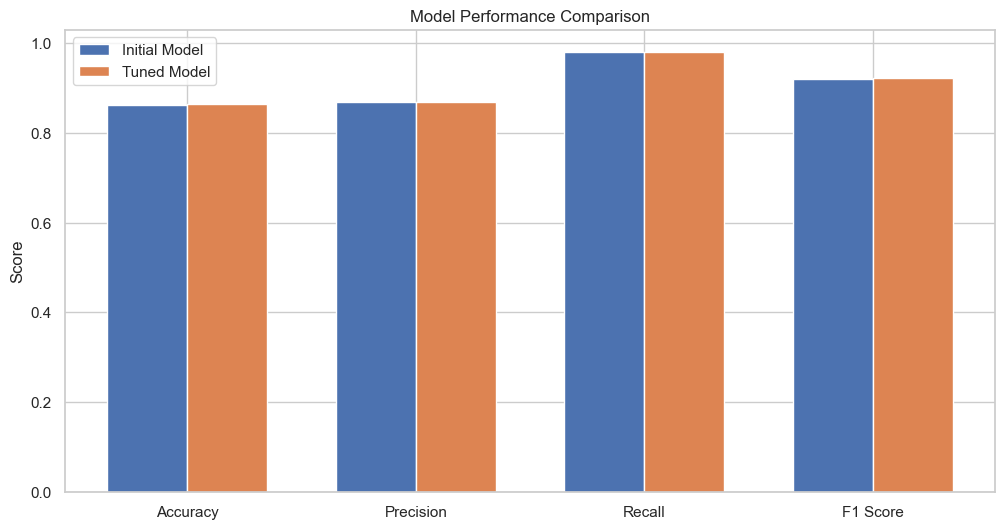

In [36]:
# Make predictions with best model
y_pred_best = best_model.predict(X_test)

# Evaluate best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Best Model - Accuracy: {accuracy_best:.4f}")
print(f"Best Model - Precision: {precision_best:.4f}")
print(f"Best Model - Recall: {recall_best:.4f}")
print(f"Best Model - F1 Score: {f1_best:.4f}")

# Display classification report
print("\nBest Model - Classification Report:")
print(classification_report(y_test, y_pred_best))

# Compare model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
original_scores = [accuracy, precision, recall, f1]
best_scores = [accuracy_best, precision_best, recall_best, f1_best]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, original_scores, width, label='Initial Model')
rects2 = ax.bar(x + width/2, best_scores, width, label='Tuned Model')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

## Feature Importance Analysis

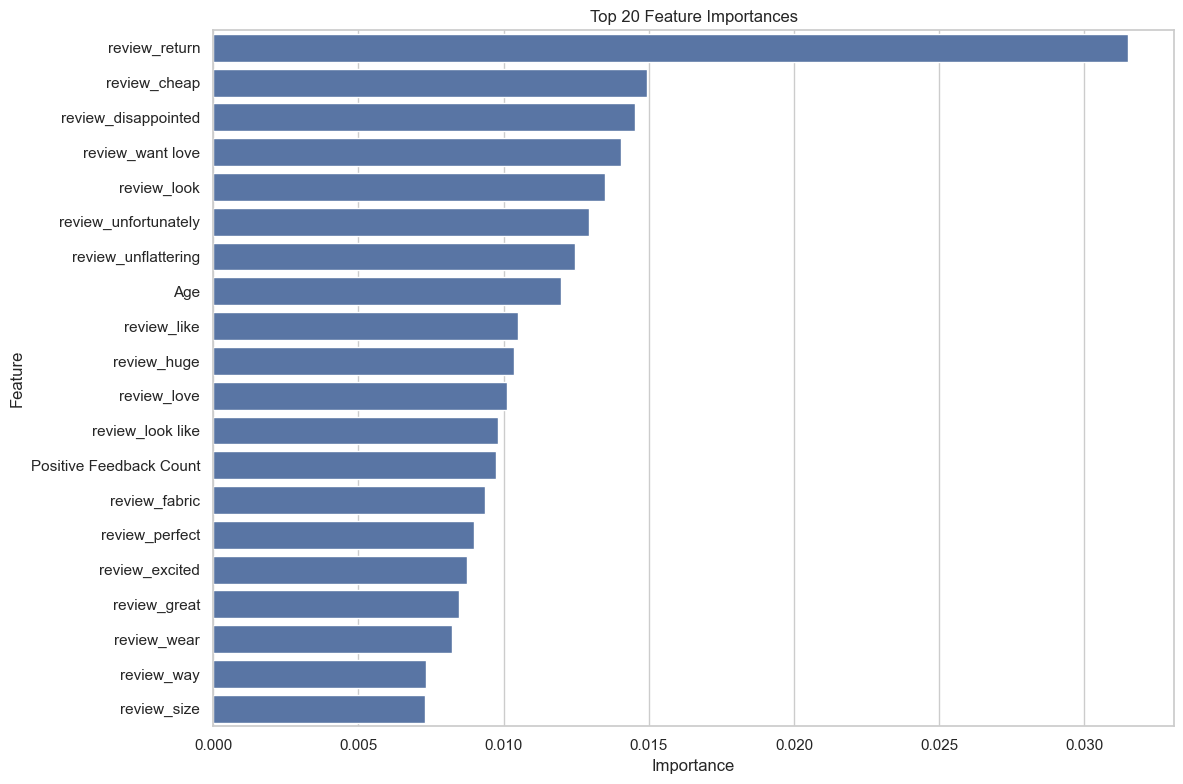

In [37]:
# Extract feature importances
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names
feature_names = (
    numerical_features + 
    list(best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features)) +
    [f"title_{word}" for word in 
     best_model.named_steps['preprocessor']
     .named_transformers_['title']
     .named_steps['tfidf']
     .get_feature_names_out()] +
    [f"review_{word}" for word in 
     best_model.named_steps['preprocessor']
     .named_transformers_['review']
     .named_steps['tfidf']
     .get_feature_names_out()]
)

# Create DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Display top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

## Testing the Model on New Data

In [38]:
# Create new test data
new_data = pd.DataFrame({
    'Clothing ID': [1077, 1049],
    'Age': [35, 45],
    'Title': ['Great dress', 'Love this jumpsuit'],
    'Review Text': [
        'I love this dress, it fits perfectly and looks amazing.',
        'This jumpsuit is so comfortable and stylish.'
    ],
    'Positive Feedback Count': [5, 10],
    'Division Name': ['General', 'General Petite'],
    'Department Name': ['Dresses', 'Bottoms'],
    'Class Name': ['Dresses', 'Pants']
})

# Make predictions
predictions = best_model.predict(new_data)
probabilities = best_model.predict_proba(new_data)

# Display results
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    recommendation = "Recommended" if pred == 1 else "Not Recommended"
    confidence = prob[pred] * 100
    print(f"Review {i+1}: {recommendation} (Confidence: {confidence:.2f}%)")

Review 1: Recommended (Confidence: 99.00%)
Review 2: Recommended (Confidence: 98.00%)


## Saving the Model

In [39]:
# Save the best model
joblib.dump(best_model, 'recommendation_model.pkl')

print("Model successfully saved to recommendation_model.pkl")

Model successfully saved to recommendation_model.pkl
